In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
np.set_printoptions(precision=5)

import pandas as pd
pd.set_option('display.precision', 5)

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

In [4]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [5]:
from sklearn.metrics import accuracy_score
y_train_hat = clf.predict(X_train)
print('train accuracy: %.5f'%accuracy_score(y_train, y_train_hat))
y_test_hat = clf.predict(X_test)
print('test accuracy: %.5f'%accuracy_score(y_test, y_test_hat))

train accuracy: 1.00000
test accuracy: 0.93706


In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

In [7]:
training_accuracy = []
test_accuracy = []

m_settings = [1, 2, 5, 7, 10, 20]
for m in m_settings:
    # build the model
    clf = DecisionTreeClassifier(min_samples_leaf=m, random_state=0)
    clf.fit(X_train, y_train)
    
    # accuracy on the training set
    y_train_hat = clf.predict(X_train)
    training_accuracy.append(accuracy_score(y_train, y_train_hat))
    
    # accuracy on the test set (generalization)
    y_test_hat = clf.predict(X_test)
    test_accuracy.append(accuracy_score(y_test, y_test_hat))

In [8]:
pd.DataFrame({'min_samples_leaf': m_settings,
              'training accuracy': training_accuracy,
              'test accuracy': test_accuracy}
            )

,min_samples_leaf,training accuracy,test accuracy
0,1,1.00000,0.93706
1,2,0.99061,0.93706
2,5,0.97653,0.93706
3,7,0.96244,0.95105
4,10,0.96244,0.95105
5,20,0.94601,0.91608


[Text(0.5833333333333334, 0.9, 'x[20] <= 16.795\ngini = 0.46786\nsamples = 426\nvalue = [159, 267]'),
 Text(0.4166666666666667, 0.7, 'x[27] <= 0.13595\ngini = 0.16056\nsamples = 284\nvalue = [25, 259]'),
 Text(0.3333333333333333, 0.5, 'x[1] <= 21.56\ngini = 0.03124\nsamples = 252\nvalue = [4, 248]'),
 Text(0.16666666666666666, 0.3, 'x[10] <= 0.40995\ngini = 0.00948\nsamples = 210\nvalue = [1, 209]'),
 Text(0.08333333333333333, 0.1, 'gini = 0.0\nsamples = 190\nvalue = [0, 190]'),
 Text(0.25, 0.1, 'gini = 0.095\nsamples = 20\nvalue = [1, 19]'),
 Text(0.5, 0.3, 'x[18] <= 0.01888\ngini = 0.13265\nsamples = 42\nvalue = [3, 39]'),
 Text(0.4166666666666667, 0.1, 'gini = 0.255\nsamples = 20\nvalue = [3, 17]'),
 Text(0.5833333333333334, 0.1, 'gini = 0.0\nsamples = 22\nvalue = [0, 22]'),
 Text(0.5, 0.5, 'gini = 0.45117\nsamples = 32\nvalue = [21, 11]'),
 Text(0.75, 0.7, 'x[21] <= 23.375\ngini = 0.10633\nsamples = 142\nvalue = [134, 8]'),
 Text(0.6666666666666666, 0.5, 'gini = 0.455\nsamples = 20

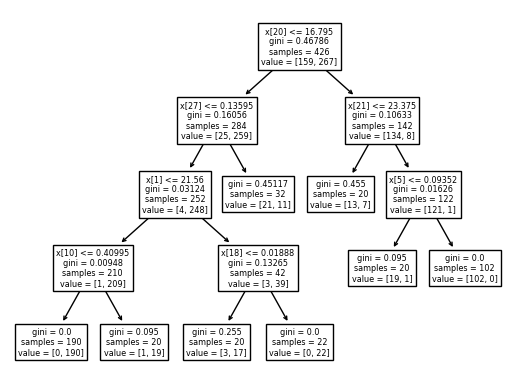

In [9]:
from sklearn import tree
tree.plot_tree(clf, precision=5)

In [10]:
clf.feature_importances_

array([0.00000e+00, 1.86437e-03, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       5.01021e-04, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       5.42188e-04, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 2.82508e-03, 0.00000e+00,
       8.30651e-01, 2.40602e-02, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 1.39556e-01, 0.00000e+00, 0.00000e+00])

In [11]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

In [12]:
training_accuracy = []
test_accuracy = []

n_settings = [1, 2, 5, 10, 20, 50, 100]
for n in n_settings:
    # build the model
    clf = RandomForestClassifier(n_estimators=n)
    clf.fit(X_train, y_train)
    
    # accuracy on the training set
    y_train_hat = clf.predict(X_train)
    training_accuracy.append(accuracy_score(y_train, y_train_hat))
    
    # accuracy on the test set (generalization)
    y_test_hat = clf.predict(X_test)
    test_accuracy.append(accuracy_score(y_test, y_test_hat))

In [13]:
pd.DataFrame({'n_estimators': n_settings,
              'training accuracy': training_accuracy,
              'test accuracy': test_accuracy}
            )

,n_estimators,training accuracy,test accuracy
0,1,0.95775,0.89510
1,2,0.97183,0.90210
2,5,0.99765,0.95105
3,10,0.99765,0.95105
4,20,0.99765,0.95804
5,50,1.00000,0.95804
6,100,1.00000,0.95804


In [14]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [15]:
clf.feature_importances_

array([0.04033, 0.0113 , 0.02692, 0.05785, 0.01001, 0.0192 , 0.04596,
       0.08665, 0.00524, 0.00268, 0.00956, 0.00659, 0.00839, 0.02436,
       0.00687, 0.0026 , 0.00927, 0.00568, 0.00429, 0.00481, 0.05634,
       0.01483, 0.09196, 0.20529, 0.01559, 0.00908, 0.02657, 0.17535,
       0.01021, 0.00624])